<a href="https://colab.research.google.com/github/EugIva/ProzorovEI209M_CV/blob/main/HW1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import cv2
import numpy as np
from collections import deque

def find_way_from_maze(image: np.ndarray) -> tuple:
    # имг в бинарное (0 - стена, 255 - путь)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # вход и выход из лабиринта
    entrance = None
    exit = None
    for i in range(thresh.shape[1]):
        if thresh[0, i] == 255:
            entrance = (0, i)
            break
    for i in range(thresh.shape[1]):
        if thresh[thresh.shape[0] - 1, i] == 255:
            exit = (thresh.shape[0] - 1, i)
            break

    if entrance is None or exit is None:
        return None

    # очередь для поиска в ширину
    queue = deque([(entrance, [entrance])])

    # матрица для хранения посещенных точек
    visited = np.zeros(thresh.shape, dtype=bool)

    while queue:
        (x, y), path = queue.popleft()
        if (x, y) == exit:
            return np.array(path)

        # Пометить точку как посещенную
        visited[x, y] = True

        # Добавить соседние точки в очередь
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if (0 <= nx < thresh.shape[0] and 0 <= ny < thresh.shape[1] and
                    thresh[nx, ny] == 255 and not visited[nx, ny]):
                queue.append(((nx, ny), path + [(nx, ny)]))

    # путь не найден
    return None

In [4]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.

    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

In [5]:
def plot_maze_path(image: np.ndarray, coords: np.ndarray) -> np.ndarray:
    img_wpath = image.copy()
    if coords.size > 0:  # Проверка на наличие координат
        for coord in coords:
            x, y = coord
            img_wpath[x, y, :] = [255, 0, 0]  # Рисуем путь красного цвета
    return img_wpath

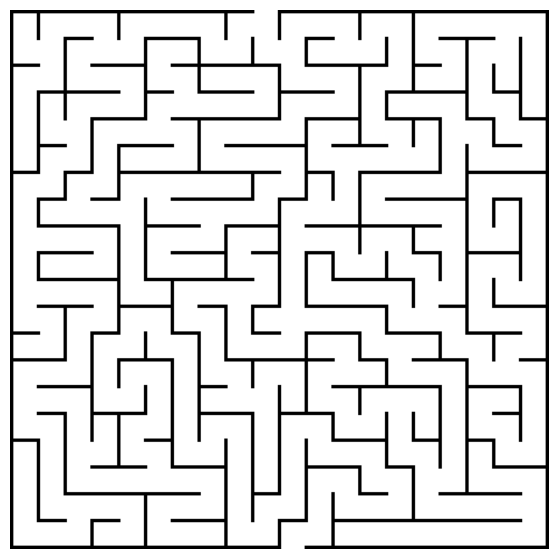

In [ ]:
test_image = cv2.imread('20 by 20 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт.

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)